In [264]:
# Import necessary packages
import os
import matplotlib.pyplot as plt #visualizations
import seaborn as sns #visualizations
import pandas as pd #dataframe
import numpy as np #numerical operations
from scipy import stats #outliers

In [265]:
# Load the data and view the first few records
os.chdir("C:\\Users\\Abhishek Iyet\\Desktop\\ION_Energy_Data_Analysis")
battery_data = pd.read_csv("Battery_Data.csv")

battery_data_backup = battery_data

battery_data.head()

,Timestamp,Current,Total voltage,SOC,Temperature,SOH,Equivalent cycle,Application status,Grid status,Grid power,Grid energy consumption,Grid cumulative energy consumption
0,1556701215000,0,66.72,1.0,25.229167,1.000000,0.0,1,1,0.0,0.0,0.0
1,1556702215000,0,66.72,1.0,25.528210,0.999774,0.0,1,1,0.0,0.0,0.0
2,1556703215000,0,66.72,1.0,25.859735,0.999679,0.0,1,1,0.0,0.0,0.0
3,1556704215000,0,66.72,1.0,26.204830,0.999606,0.0,1,1,0.0,0.0,0.0
4,1556705215000,0,66.72,1.0,26.553448,0.999542,0.0,1,1,0.0,0.0,0.0


In [266]:
# View data dimensions
print(battery_data.shape)
print()
# Check data types of all columns
print(battery_data.dtypes)

(31104, 12)

Timestamp                               int64
Current                                 int64
Total voltage                         float64
SOC                                   float64
Temperature                           float64
SOH                                   float64
Equivalent cycle                      float64
Application status                      int64
Grid status                             int64
Grid power                            float64
Grid energy consumption               float64
Grid cumulative energy consumption    float64
dtype: object


In [268]:
# Find all columns with missing values
print(battery_data.columns[battery_data.isnull().any()])
print()
# Find the number of unique values in each column
battery_data.nunique()

Index([], dtype='object')



Timestamp                             31104
Current                                   3
Total voltage                         12415
SOC                                   11395
Temperature                           31104
SOH                                   31104
Equivalent cycle                      11397
Application status                        2
Grid status                               2
Grid power                            11028
Grid energy consumption               11028
Grid cumulative energy consumption    11029
dtype: int64

In [269]:
# Convert timestamp to human - readable date and view the first few records (Timestamp is in milliseconds)
battery_data['Timestamp'] = pd.to_datetime(battery_data['Timestamp'], unit = 'ms')
battery_data.head()

,Timestamp,Current,Total voltage,SOC,Temperature,SOH,Equivalent cycle,Application status,Grid status,Grid power,Grid energy consumption,Grid cumulative energy consumption
0,2019-05-01 09:00:15,0,66.72,1.0,25.229167,1.000000,0.0,1,1,0.0,0.0,0.0
1,2019-05-01 09:16:55,0,66.72,1.0,25.528210,0.999774,0.0,1,1,0.0,0.0,0.0
2,2019-05-01 09:33:35,0,66.72,1.0,25.859735,0.999679,0.0,1,1,0.0,0.0,0.0
3,2019-05-01 09:50:15,0,66.72,1.0,26.204830,0.999606,0.0,1,1,0.0,0.0,0.0
4,2019-05-01 10:06:55,0,66.72,1.0,26.553448,0.999542,0.0,1,1,0.0,0.0,0.0


In [270]:
# View data type of 'Timestamp' column
battery_data_backup = battery_data
print(battery_data.loc[:, 'Timestamp'].dtypes)

datetime64[ns]


In [271]:
# Data Visualization and Descriptive Statistics
def plotHistAndLineChart(columnName):
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(11, 4))
    ax[0].hist(battery_data[columnName], facecolor = 'peru', edgecolor = 'blue', bins = 30)
    ax[1].plot(battery_data[columnName])
    
    plt.tight_layout()
    plt.show()

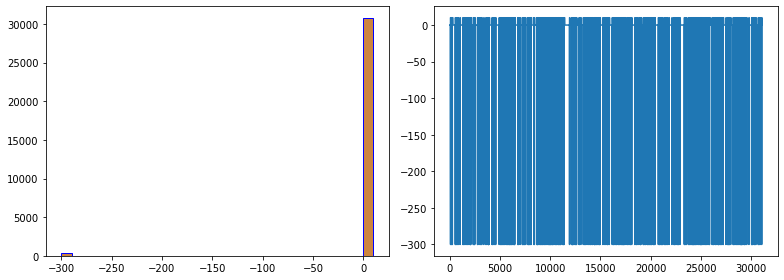

Min = -300
Max = 10
Range = 310
Mean = -0.0038580246913580245
Median = 0.0
Mode = 0.0
Skewness = -8.74314586405305
Kurtosis = 76.17352749123114


In [274]:
# 1.) Current - Plot and statistics
plotHistAndLineChart('Current')

# Column Statistics
print("Min =", battery_data['Current'].min())
print("Max =", battery_data['Current'].max())
print("Range =", battery_data['Current'].max() - battery_data['Current'].min())
print("Mean =", battery_data['Current'].mean())
print("Median =", battery_data['Current'].median())
print("Mode =", battery_data.mode()['Current'][0])
print("Skewness =", battery_data['Current'].skew())
print("Kurtosis =", battery_data['Current'].kurtosis())

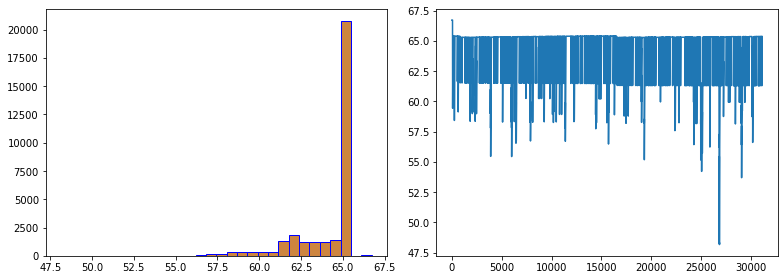

Min = 48.16034624
Max = 66.72
Range = 18.559653759999996
Mean = 64.27219585834668
Median = 65.29973519
Skewness = -2.2507541034753626
Kurtosis = 6.648196014507944


In [275]:
# 2.) Total voltage - Plot and statistics
plotHistAndLineChart('Total voltage')

# Column Statistics
print("Min =", battery_data['Total voltage'].min())
print("Max =", battery_data['Total voltage'].max())
print("Range =", battery_data['Total voltage'].max() - battery_data['Total voltage'].min())
print("Mean =", battery_data['Total voltage'].mean())
print("Median =", battery_data['Total voltage'].median())
print("Skewness =", battery_data['Total voltage'].skew())
print("Kurtosis =", battery_data['Total voltage'].kurtosis())

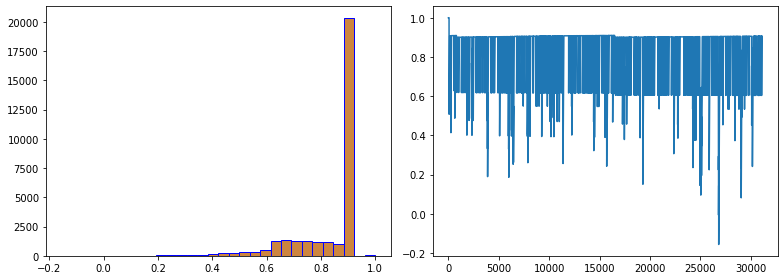

Min = -0.155713561
Max = 1.0
Range = 1.155713561
Mean = 0.8289450855605796
Median = 0.901914455
Skewness = -2.1408437741895656
Kurtosis = 5.294834290238947


In [276]:
# 3.) SOC - Plot and statistics
plotHistAndLineChart('SOC')

# Column Statistics
print("Min =", battery_data['SOC'].min())
print("Max =", battery_data['SOC'].max())
print("Range =", battery_data['SOC'].max() - battery_data['SOC'].min())
print("Mean =", battery_data['SOC'].mean())
print("Median =", battery_data['SOC'].median())
print("Skewness =", battery_data['SOC'].skew())
print("Kurtosis =", battery_data['SOC'].kurtosis())

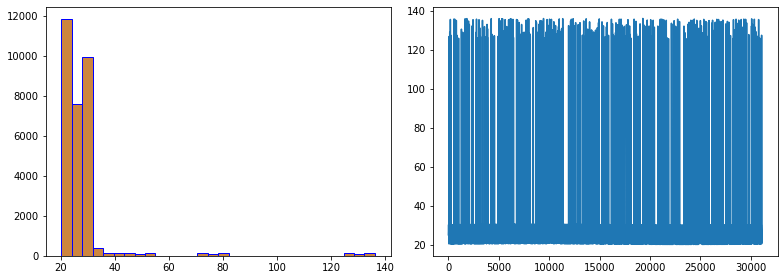

Min = 20.26327524
Max = 136.1181556
Range = 115.85488036
Mean = 27.915732132518286
Median = 26.06084798
Skewness = 6.0832549960270725
Kurtosis = 41.84800202680063


In [277]:
# 4.) Temperature - Plot and statistics
plotHistAndLineChart('Temperature')

# Column Statistics
print("Min =", battery_data['Temperature'].min())
print("Max =", battery_data['Temperature'].max())
print("Range =", battery_data['Temperature'].max() - battery_data['Temperature'].min())
print("Mean =", battery_data['Temperature'].mean())
print("Median =", battery_data['Temperature'].median())
print("Skewness =", battery_data['Temperature'].skew())
print("Kurtosis =", battery_data['Temperature'].kurtosis())

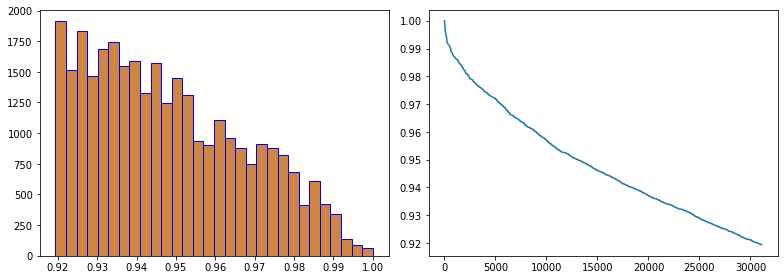

Min = 0.919398347
Max = 1.0
Range = 0.080601653
Mean = 0.9482255818446824
Median = 0.945187218
Skewness = 0.46512441304086727
Kurtosis = -0.7903422592607519


In [278]:
# 5.) SOH - Plot and statistics
plotHistAndLineChart('SOH')

# Column Statistics
print("Min =", battery_data['SOH'].min())
print("Max =", battery_data['SOH'].max())
print("Range =", battery_data['SOH'].max() - battery_data['SOH'].min())
print("Mean =", battery_data['SOH'].mean())
print("Median =", battery_data['SOH'].median())
print("Skewness =", battery_data['SOH'].skew())
print("Kurtosis =", battery_data['SOH'].kurtosis())

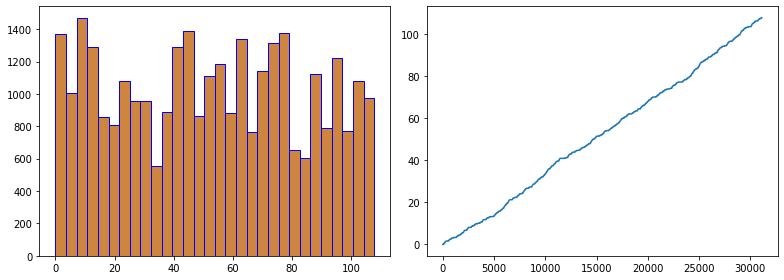

Min = 0.0
Max = 107.8477185
Range = 107.8477185
Mean = 52.56384032779207
Median = 52.49950728
Skewness = 0.02132460845710409
Kurtosis = -1.174411610787497


In [279]:
# 6.) Equivalent cycle - Plot and statistics
plotHistAndLineChart('Equivalent cycle')

# Column Statistics
print("Min =", battery_data['Equivalent cycle'].min())
print("Max =", battery_data['Equivalent cycle'].max())
print("Range =", battery_data['Equivalent cycle'].max() - battery_data['Equivalent cycle'].min())
print("Mean =", battery_data['Equivalent cycle'].mean())
print("Median =", battery_data['Equivalent cycle'].median())
print("Skewness =", battery_data['Equivalent cycle'].skew())
print("Kurtosis =", battery_data['Equivalent cycle'].kurtosis())

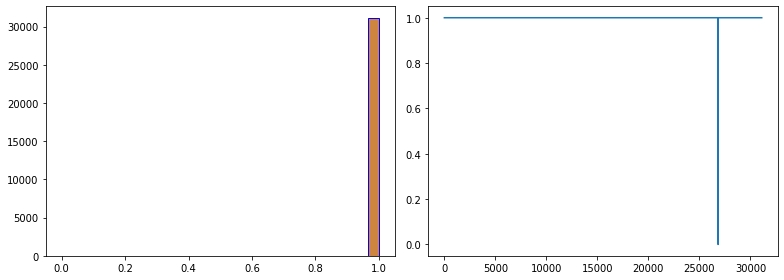

Mode = 1.0


In [280]:
# 7.) Application status - Plot and statistics
plotHistAndLineChart('Application status')

# Column Statistics
print("Mode =", battery_data.mode()['Application status'][0])

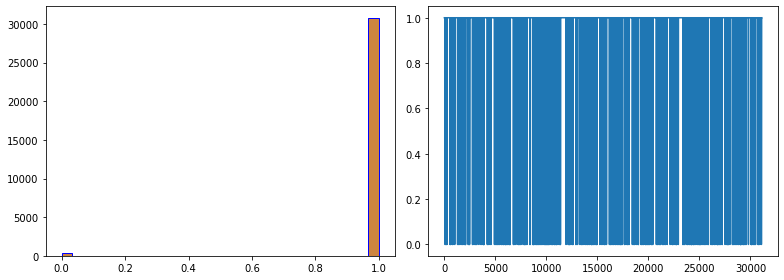

Mode = 1.0


In [281]:
# 8.) Grid status - Plot and statistics
plotHistAndLineChart('Grid status')

# Column Statistics
print("Mode =", battery_data.mode()['Grid status'][0])

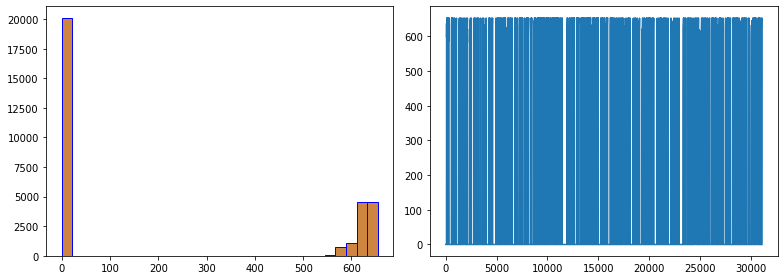

Min = 0.0
Max = 654.0143492999999
Range = 654.0143492999999
Mean = 221.4945776330725
Median = 0.0
Skewness = 0.61367876551868
Kurtosis = -1.6162294452723


In [282]:
# 9.) Grid power - Plot and statistics
plotHistAndLineChart('Grid power')

# Column Statistics
print("Min =", battery_data['Grid power'].min())
print("Max =", battery_data['Grid power'].max())
print("Range =", battery_data['Grid power'].max() - battery_data['Grid power'].min())
print("Mean =", battery_data['Grid power'].mean())
print("Median =", battery_data['Grid power'].median())
print("Skewness =", battery_data['Grid power'].skew())
print("Kurtosis =", battery_data['Grid power'].kurtosis())

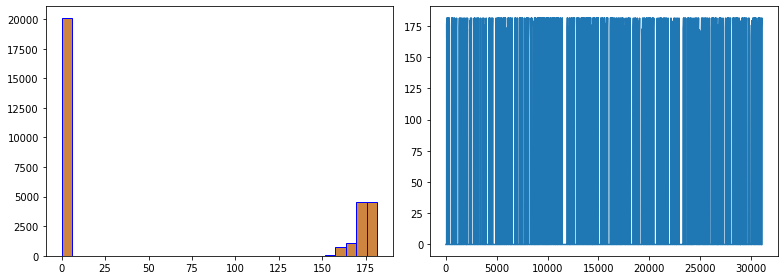

Min = 0.0
Max = 181.67065259999998
Range = 181.67065259999998
Mean = 61.52627156491777
Median = 0.0
Skewness = 0.6136787655180632
Kurtosis = -1.6162294452737485


In [283]:
# 10.) Grid energy consumption - Plot and statistics
plotHistAndLineChart('Grid energy consumption')

# Column Statistics
print("Min =", battery_data['Grid energy consumption'].min())
print("Max =", battery_data['Grid energy consumption'].max())
print("Range =", battery_data['Grid energy consumption'].max() - battery_data['Grid energy consumption'].min())
print("Mean =", battery_data['Grid energy consumption'].mean())
print("Median =", battery_data['Grid energy consumption'].median())
print("Skewness =", battery_data['Grid energy consumption'].skew())
print("Kurtosis =", battery_data['Grid energy consumption'].kurtosis())

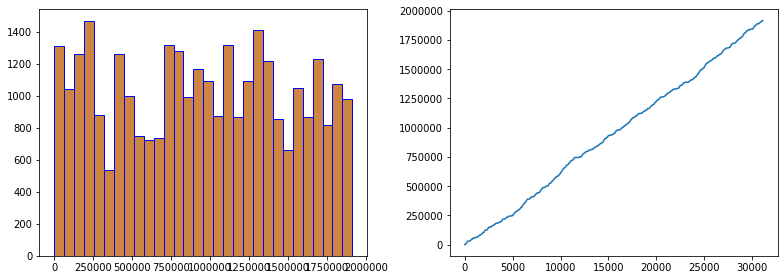

Min = 0.0
Max = 1913713.1509999998
Range = 1913713.1509999998
Mean = 944224.0138667717
Median = 946656.92665
Skewness = -0.007046605451148671
Kurtosis = -1.1802187552507817


In [284]:
# 11.) Grid cumulative energy consumption - Plot and statistics
plotHistAndLineChart('Grid cumulative energy consumption')

# Column Statistics
print("Min =", battery_data['Grid cumulative energy consumption'].min())
print("Max =", battery_data['Grid cumulative energy consumption'].max())
print("Range =", battery_data['Grid cumulative energy consumption'].max() - battery_data['Grid cumulative energy consumption'].min())
print("Mean =", battery_data['Grid cumulative energy consumption'].mean())
print("Median =", battery_data['Grid cumulative energy consumption'].median())
print("Skewness =", battery_data['Grid cumulative energy consumption'].skew())
print("Kurtosis =", battery_data['Grid cumulative energy consumption'].kurtosis())

In [285]:
# Check correlation values before removing outliers
print("Correlation between Grid status and SOC:", round(stats.pointbiserialr(battery_data['Grid status'], battery_data['SOC'])[0], 2))
print("Correlation between Equivalent cycle and SOH:", round(battery_data['Equivalent cycle'].corr(battery_data['SOH']), 2))
print("Correlation between SOC and Temperature:", round(battery_data['SOC'].corr(battery_data['Temperature']), 2))

Correlation between Grid status and SOC: 0.23
Correlation between Equivalent cycle and SOH: -0.98
Correlation between SOC and Temperature: -0.37


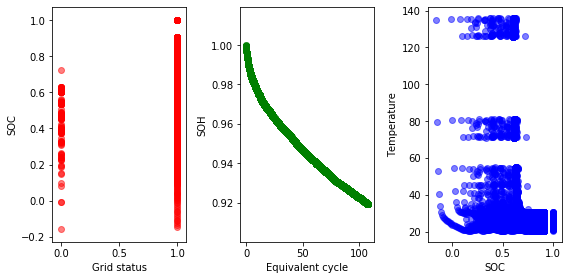

In [286]:
# Correlation Plots before removing outliers
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(8, 4))
ax[0].scatter(battery_data['Grid status'], battery_data['SOC'], color = 'red', marker = 'o', alpha = 0.5)
ax[1].scatter(battery_data['Equivalent cycle'], battery_data['SOH'], color = 'green', marker = 'o', alpha = 0.5)
ax[2].scatter(battery_data['SOC'], battery_data['Temperature'], color = 'blue', marker = 'o', alpha = 0.5)

ax[0].set_xlabel('Grid status')
ax[0].set_ylabel('SOC')

ax[1].set_xlabel('Equivalent cycle')
ax[1].set_ylabel('SOH')

ax[2].set_xlabel('SOC')
ax[2].set_ylabel('Temperature')

plt.tight_layout()
plt.show()

In [287]:
# Check for outliers in each column based on inter-quartile range
# 1.) First check IQR for each column
battery_data_backup = battery_data
battery_data_backup1 = battery_data

colsToDrop = ['Timestamp', 'Application status', 'Grid status']
battery_data = battery_data.drop(colsToDrop, 1)
battery_data_backup1 = battery_data_backup.drop(colsToDrop, 1)

Q1 = battery_data.quantile(0.25)
Q3 = battery_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Current                                   10.000000
Total voltage                              1.644328
SOC                                        0.123287
Temperature                                7.250472
SOH                                        0.031087
Equivalent cycle                          52.803202
Grid power                               617.410545
Grid energy consumption                  171.502929
Grid cumulative energy consumption    940104.831300
dtype: float64


In [288]:
# 2.) Remove outliers based on IQR values for each column
print("Before removing outliers:", battery_data.shape)
battery_data = battery_data_backup1[~((battery_data_backup1 < (Q1 - 1.5 * IQR)) |(battery_data_backup1 > (Q3 + 1.5 * IQR))).any(axis=1)]
excludedRows = list(np.where((battery_data_backup1 < (Q1 - 1.5 * IQR)) |(battery_data_backup1 > (Q3 + 1.5 * IQR)))[0])
gridStatus = battery_data_backup['Grid status'].drop(excludedRows, axis = 0)
battery_data['Grid status'] = gridStatus # Add Grid status column after excluding 
print("After removing outliers:", battery_data.shape)

Before removing outliers: (31104, 9)
After removing outliers: (28074, 10)


C:\Users\Abhishek Iyet\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


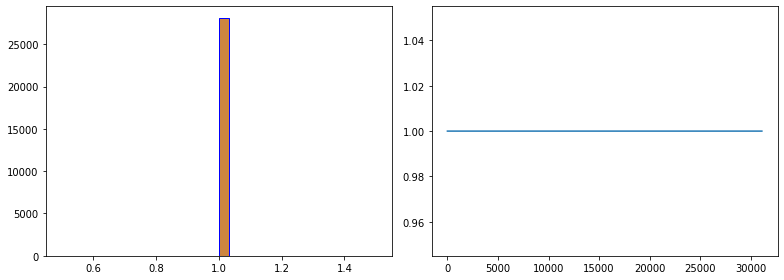

Mode = 1.0


In [289]:
# Now lets check the plots of only the 5 variables for which correlation has to be determined
# 1.) Grid status - Plot and statistics
plotHistAndLineChart('Grid status')

# Column Statistics
print("Mode =", battery_data.mode()['Grid status'][0])

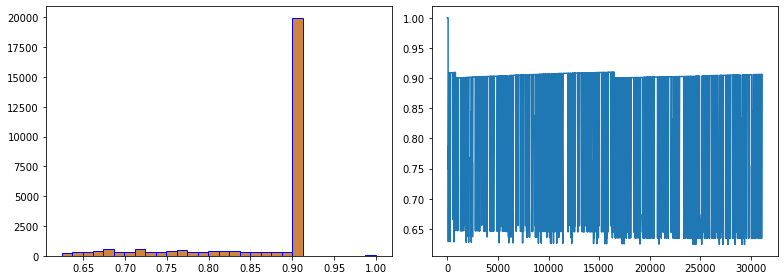

Min = 0.624176975
Max = 1.0
Range = 0.375823025
Mean = 0.8633270437121766
Median = 0.902308447
Skewness = -1.6525501433608942
Kurtosis = 1.3394594188194682


In [290]:
# 2.) SOC - Plot and statistics
plotHistAndLineChart('SOC')

# Column Statistics
print("Min =", battery_data['SOC'].min())
print("Max =", battery_data['SOC'].max())
print("Range =", battery_data['SOC'].max() - battery_data['SOC'].min())
print("Mean =", battery_data['SOC'].mean())
print("Median =", battery_data['SOC'].median())
print("Skewness =", battery_data['SOC'].skew())
print("Kurtosis =", battery_data['SOC'].kurtosis())

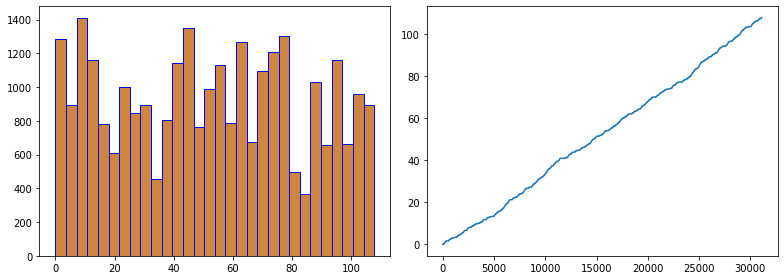

Min = 0.0
Max = 107.8477185
Range = 107.8477185
Mean = 52.286279470491635
Median = 52.09545669
Skewness = 0.03020899854242782
Kurtosis = -1.1544658392395508


In [291]:
# 3.) Equivalent cycle - Plot and statistics
plotHistAndLineChart('Equivalent cycle')

# Column Statistics
print("Min =", battery_data['Equivalent cycle'].min())
print("Max =", battery_data['Equivalent cycle'].max())
print("Range =", battery_data['Equivalent cycle'].max() - battery_data['Equivalent cycle'].min())
print("Mean =", battery_data['Equivalent cycle'].mean())
print("Median =", battery_data['Equivalent cycle'].median())
print("Skewness =", battery_data['Equivalent cycle'].skew())
print("Kurtosis =", battery_data['Equivalent cycle'].kurtosis())

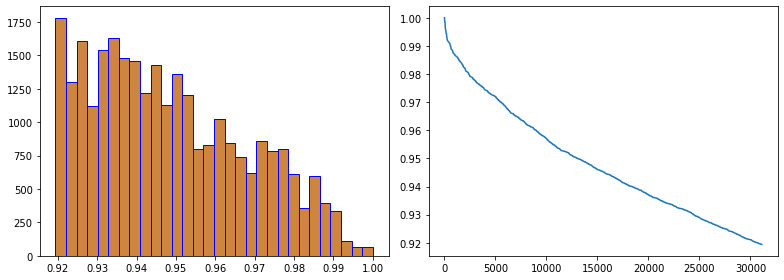

Min = 0.919398347
Max = 1.0
Range = 0.080601653
Mean = 0.9483968427689706
Median = 0.9454136585
Skewness = 0.4630689643943504
Kurtosis = -0.7863222951534983


In [292]:
# 4.) SOH - Plot and statistics
plotHistAndLineChart('SOH')

# Column Statistics
print("Min =", battery_data['SOH'].min())
print("Max =", battery_data['SOH'].max())
print("Range =", battery_data['SOH'].max() - battery_data['SOH'].min())
print("Mean =", battery_data['SOH'].mean())
print("Median =", battery_data['SOH'].median())
print("Skewness =", battery_data['SOH'].skew())
print("Kurtosis =", battery_data['SOH'].kurtosis())

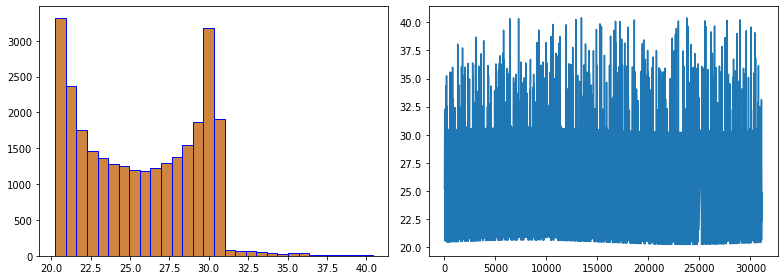

Min = 20.26327524
Max = 40.39635371
Range = 20.13307847
Mean = 25.67739768815736
Median = 25.66350561
Skewness = 0.15336434217370537
Kurtosis = -0.9699943427823792


In [293]:
# 5.) Temperature - Plot and statistics
plotHistAndLineChart('Temperature')

# Column Statistics
print("Min =", battery_data['Temperature'].min())
print("Max =", battery_data['Temperature'].max())
print("Range =", battery_data['Temperature'].max() - battery_data['Temperature'].min())
print("Mean =", battery_data['Temperature'].mean())
print("Median =", battery_data['Temperature'].median())
print("Skewness =", battery_data['Temperature'].skew())
print("Kurtosis =", battery_data['Temperature'].kurtosis())

In [294]:
# Check correlation values after removing outliers
print("Correlation between Grid status and SOC:", round(stats.pointbiserialr(battery_data['Grid status'], battery_data['SOC'])[0], 2))
print("Correlation between Equivalent cycle and SOH:", round(battery_data['Equivalent cycle'].corr(battery_data['SOH']), 2))
print("Correlation between SOC and Temperature:", round(battery_data['SOC'].corr(battery_data['Temperature']), 2))

Correlation between Grid status and SOC: nan
Correlation between Equivalent cycle and SOH: -0.98
Correlation between SOC and Temperature: -0.17


C:\Users\Abhishek Iyet\Anaconda3\lib\site-packages\scipy\stats\stats.py:3399: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


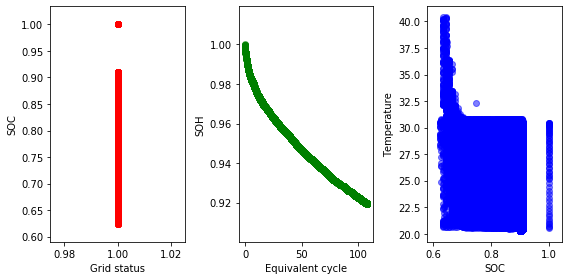

In [295]:
# Correlation Plots after removing outliers
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(8, 4))
ax[0].scatter(battery_data['Grid status'], battery_data['SOC'], color = 'red', marker = 'o', alpha = 0.5)
ax[1].scatter(battery_data['Equivalent cycle'], battery_data['SOH'], color = 'green', marker = 'o', alpha = 0.5)
ax[2].scatter(battery_data['SOC'], battery_data['Temperature'], color = 'blue', marker = 'o', alpha = 0.5)

ax[0].set_xlabel('Grid status')
ax[0].set_ylabel('SOC')

ax[1].set_xlabel('Equivalent cycle')
ax[1].set_ylabel('SOH')

ax[2].set_xlabel('SOC')
ax[2].set_ylabel('Temperature')

plt.tight_layout()
plt.show()